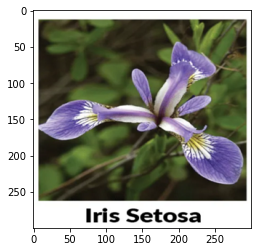

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image 

firstImage = Image.open('Set.PNG')
firstImage = firstImage.resize((300, 300))
firstImagePlot = plt.imshow(firstImage)


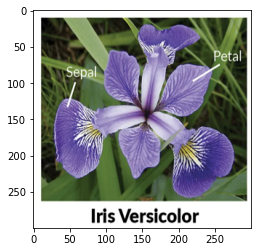

In [3]:
secondImage = Image.open('Ver.PNG')
secondImage = secondImage.resize((300, 300))
secondImagePlot = plt.imshow(secondImage)

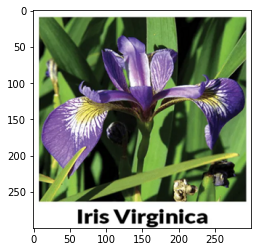

In [4]:
thirdImage = Image.open('Vir.PNG')
thirdImage = thirdImage.resize((300, 300))
thirdImagePlot = plt.imshow(thirdImage)


In [5]:

iris = sns.load_dataset("iris") 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


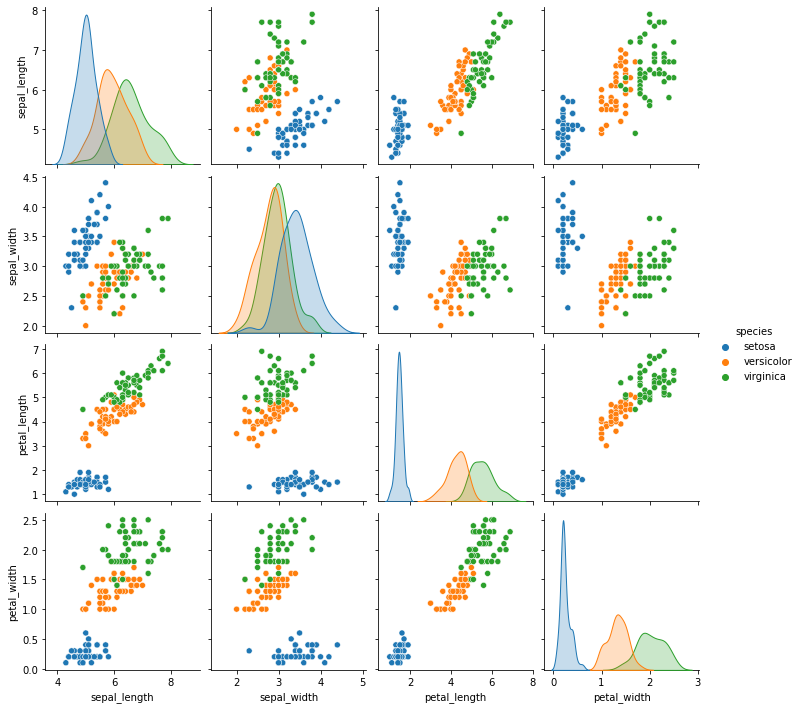

In [5]:
pp = sns.pairplot(iris, hue = 'species')
pp

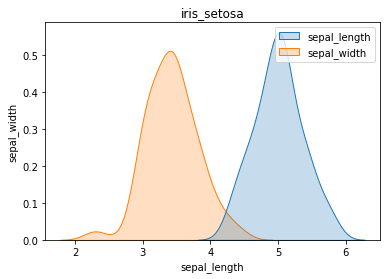

In [14]:
iris_setosa = iris[iris['species'] == 'setosa']
iris_setosa

sns.kdeplot(data = iris_setosa[['sepal_length', 'sepal_width']], shade = 'true')
plt.title('iris_setosa')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
x = iris.drop('species', axis = 1)
y = iris['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 90)
y_train

89     versicolor
78     versicolor
99     versicolor
134     virginica
39         setosa
          ...    
37         setosa
58     versicolor
67     versicolor
114     virginica
91     versicolor
Name: species, Length: 105, dtype: object

In [8]:
from sklearn.svm import SVC
iris_SVC = SVC()
iris_SVC.fit(x_train, y_train)


SVC()

In [9]:
from sklearn.metrics import confusion_matrix, classification_report 
y_predictions = iris_SVC.predict(x_test)
print (confusion_matrix(y_test, y_predictions))

[[16  0  0]
 [ 0  8  1]
 [ 0  2 18]]


In [10]:
print (classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.80      0.89      0.84         9
   virginica       0.95      0.90      0.92        20

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45



In [11]:
from sklearn.model_selection import GridSearchCV
iris_grid = {'C' :[0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001]}
irisGS = GridSearchCV(SVC(), iris_grid, verbose = 3)

irisGS.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=0.1, gamma=0.001; total time=   0.0s
[CV 2/5] END .............................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [12]:
y_predictions = irisGS.predict(x_test)
print (confusion_matrix(y_test, y_predictions))

[[16  0  0]
 [ 0  8  1]
 [ 0  0 20]]


In [13]:
print (classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.89      0.94         9
   virginica       0.95      1.00      0.98        20

    accuracy                           0.98        45
   macro avg       0.98      0.96      0.97        45
weighted avg       0.98      0.98      0.98        45

